### Program 1

In [6]:
#import pandas as pd
import numpy as np
data = pd.read_csv('lab1.csv')
data
features = np.array(data)[:,:-1]
features
target = np.array(data)[:,-1]
target

for i ,val in enumerate(target):
    if val == 'yes':
        specific_h = features[i].copy()
        break

print(specific_h)

for i,val in enumerate(features):
    if target[i] == 'yes':
        for x in range(len(specific_h)):
            if val[x] != specific_h[x]:
                specific_h[x] = '?'
print(specific_h)            

['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
['sunny' 'warm' '?' 'strong' '?' '?']


### Program 2

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv('lab1.csv')
data
features=np.array(data)[:,:-1]
features
target=np.array(data)[:,-1]
target
specific_h=features[0].copy()
print("initialization of specific_h an general_h")
print(specific_h)
general_h=[["?" for i in range(len(specific_h))]for i in range(len(specific_h))]
print(general_h)
for i,h in enumerate(features):
    if target[i] =="yes":
        for x in range(len(specific_h)):
            
            if h[x]!=specific_h[x]:
                specific_h[x]='?'
                general_h[x][x]='?'
    if target[i]=="no":
        for x in range(len(specific_h)):
            if h[x]!=specific_h[x]:
                general_h[x][x]=specific_h[x]
            else:
                general_h[x][x]='?'
            print(specific_h,"\n")
            print(general_h,"\n")
indices=[i for i,val in enumerate(general_h) if val==['?','?','?','?','?','?']]
for i in indices:
    general_h.remove(['?','?','?','?','?','?'])
print("\nfinal specific_h:",specific_h,sep="\n")
print("final general_h:",general_h,sep="\n")

initialization of specific_h an general_h
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
['sunny' 'warm' '?' 'strong' 'warm' 'same'] 

[['sunny', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']] 

['sunny' 'warm' '?' 'strong' 'warm' 'same'] 

[['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']] 

['sunny' 'warm' '?' 'strong' 'warm' 'same'] 

[['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?'

### Program 3


In [ ]:
import pandas as pd
from collections import Counter
import math

tennis= pd.read_csv('tennis.csv')
print("\n given play tennis dataset:\n \n",tennis)

def entropy(alist):
    c = Counter(x for x in alist)
    instances = len(alist)
    prob = [x / instances for x in c.values()]
    return sum( [-p*math.log(p,2) for p in prob] )
    
def information_gain(d,split,target):
    splitting=d.groupby(split)
    n=len(d.index)
    agent = splitting.agg({target : [entropy,lambda x: len(x)/n ] })[target]
    agent.columns = ['entropy','observations']
    newentropy = sum(agent['entropy']*agent['observations'])
    oldentropy=entropy(d[target])
    return oldentropy - newentropy

def id3(sub,target,a):
    count = Counter(x for x in sub[target])#class of YES / NO
    if len(count)==1:
        return next(iter(count))#next i/p dataset
    else:
        gain=[information_gain(sub,attr,target) for attr in a]
        print("\n gain=",gain)
        maximum = gain.index(max(gain))
        best = a[maximum]
        print("\nbest attribute=",best)
        tree={best:{}}
        remaining=[i for i in a if i != best]   
        
        for val,subset in sub.groupby(best):
            subtree = id3(subset,target,remaining)
            tree[best][val] = subtree
        return tree 
    
names = list(tennis.columns)
print("\nlist of attributes:",names)
names.remove("PlayTennis")
print("\npredicting attributes:",names)
tree=id3(tennis,'PlayTennis',names)
print("\n\n the resultant decision tree is:\n")
print(tree)

### Program 4


In [4]:
import numpy as np
x=np.array(([2,9],[1,5],[3,6]),dtype=float)
y=np.array(([92],[86],[89]),dtype=float)
x=x/np.amax(x,axis=0)
y=y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivatives_sigmoid(x):
    return x*(1-x)
epoch=7000
lr=0.1
inputlayer_neurons=2
hiddenlayer_neurons=3
output_neurons=1

wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

for i in range(epoch):
    hinp1=np.dot(x,wh)
    hinp=hinp1+bh
    hlayer_act=sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp=outinp1+bout
    output=sigmoid(outinp)
    
    EO=y-output
    outgrad=derivatives_sigmoid(output)
    d_output=EO*outgrad
    EH=d_output.dot(wout.T)
    hiddengrad=derivatives_sigmoid(hlayer_act)
    d_hiddenlayer=EH*hiddengrad
    wout+=hlayer_act.T.dot(d_output)*lr

print("Input:\n"+str(x))
print("Actual output: \n"+str(y))
print("Predicted output:\n",output)

Input:
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted output:
 [[0.89652276]
 [0.87954289]
 [0.8931647 ]]


### Program 5

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

data=pd.read_csv('textdata12.csv',names=['message','label'])
print('the dataset is',data)
print('the dimensions of the dataset',data.shape)
data['labelnum']=data.label.map({'pos':1,'neg':0})
x=data.message
y=data.labelnum
print(x,y)

vectorizer=TfidfVectorizer()
data=vectorizer.fit_transform(x)
print("\n the feature of dataset:\n")
df=pd.DataFrame(data.toarray(),columns=vectorizer.get_feature_names_out())
df.head()
print("\n train test split")
xtrain,xtest,ytrain,ytest=train_test_split(data,y,test_size=0.3,random_state=42)
print("\n the total number of training data:",ytrain.shape)
print("\n the total number of test data:",ytest.shape)
clf=MultinomialNB().fit(xtrain,ytrain)
predict=clf.predict(xtest)
predicted=clf.predict(xtest)
print("\n accuracy of the classifier is",metrics.accuracy_score(ytest,predicted))
print("\n confusion matrix is\n",metrics.confusion_matrix(ytest,predicted))
print("\n classification report is\n",metrics.classification_report(ytest,predicted))
print("\n the value of precision is\n",metrics.precision_score(ytest,predicted))
print("\n the value of recall  is\n",metrics.recall_score(ytest,predicted))

the dataset is                                   message label
0                        i love sandwitch   pos
1                this is an amazing place   pos
2      i feel very good about these beers   pos
3                    this is my best work   pos
4                    what an awesome view   pos
5            i do not like this resturant   neg
6                i am tired of this stuff   neg
7                   i cant deal with this   neg
8                    he is my sworn enemy   neg
9                     my boss is horrible   neg
10               this is an awesome place   pos
11  i do not like the taste of this juice   neg
12                        i love to dance   pos
13      i am sick and tired of this place   neg
14                   what a great holiday   pos
15           that is bad locality to stay   neg
16         we will have good fun tomorrow   pos
17       i went to my enemy's house today   neg
the dimensions of the dataset (18, 2)
0                          i love s

### Program 6

In [30]:
import warnings
import pandas as pd
col=['Age','Gender','Familylist','Diet','LifeStyle','Cholesterol','heartDisease']
data=pd.read_csv('lab6.csv',names=col)
print(data)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in range(len(col)):
    data.iloc[:,i]=encoder.fit_transform(data.iloc[:,i])
X=data.iloc[:,0:6]
y=data.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
print('confusion matrix',confusion_matrix(y_test,y_pred))

                   Age  Gender Familylist    Diet LifeStyle Cholesterol  \
0   SuperSeniorCitizen    Male        Yes  Medium  Sedetary        High   
1   SuperSeniorCitizen  Female        Yes  Medium  Sedetary        High   
2        SeniorCitizen    Male         No    High  Moderate  Borderline   
3                 Teen    Male        Yes  Medium  Sedetary      Normal   
4                Youth  Female        Yes    High   Athlete      Normal   
5           MiddleAged    Male        Yes  Medium    Active        High   
6                 Teen    Male        Yes    High  Moderate        High   
7   SuperSeniorCitizen    Male        Yes  Medium  Sedetary        High   
8                Youth  Female        Yes    High   Athlete      Normal   
9        SeniorCitizen  Female         No    High   Athlete      Normal   
10                Teen  Female         No  Medium  Moderate        High   
11                Teen    Male        Yes  Medium  Sedetary      Normal   
12          MiddleAged  F

C:\Users\BITM\AppData\Local\Temp\ipykernel_8384\3744051054.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i]=encoder.fit_transform(data.iloc[:,i])
C:\Users\BITM\AppData\Local\Temp\ipykernel_8384\3744051054.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,i]=encoder.fit_transform(data.iloc[:,i])
C:\Users\BITM\AppData\Local\Temp\ipykernel_8384\3744051054.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retai

### Program 7

Input Data and Shape
(25, 2)
X [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]]
Graph for whole dataset


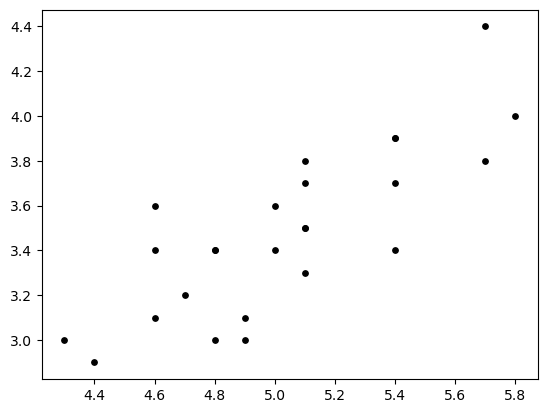

C:\Users\BITM\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\BITM\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


labels  [5 8 2 2 5 0 1 5 6 8 0 1 8 6 7 4 0 5 7 3 9 3 1 5 1]
Centriods    [[5.4        3.83333333]
 [4.7        3.45      ]
 [4.65       3.15      ]
 [5.1        3.75      ]
 [5.7        4.4       ]
 [5.06       3.46      ]
 [4.35       2.95      ]
 [5.75       3.9       ]
 [4.86666667 3.03333333]
 [5.4        3.4       ]]
Graph using Kmeans Algorithm 


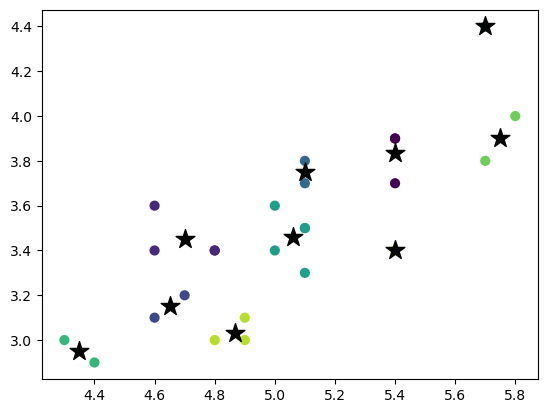

Graph using Em algorithm


C:\Users\BITM\Documents\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


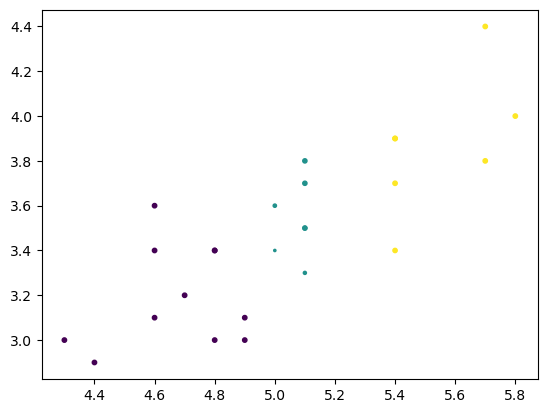

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
data=pd.read_csv('lab7.csv')
print('Input Data and Shape')
print(data.shape)
data.head()
f1=data['V1'].values
f2=data['V2'].values
X=np.array(list(zip(f1,f2)))
print("X",X)
print("Graph for whole dataset")
plt.scatter(f1,f2,c='black',s=15)
plt.show()
kmeans=KMeans(10,random_state=42)
labels=kmeans.fit(X).predict(X)
print("labels ",labels)
centroids=kmeans.cluster_centers_
print("Centriods   ",centroids)
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')
print("Graph using Kmeans Algorithm ")
plt.scatter(centroids[:,0],centroids[:,1],marker='*',s=200,c='#050505')
plt.show()
gmm=GaussianMixture(n_components=3).fit(X)
labels=gmm.predict(X)
probs=gmm.predict_proba(X)
size=10*probs.max(1)**3
print("Graph using Em algorithm")
plt.scatter(X[:,0],X[:,1],c=labels,s=size,cmap='viridis')
plt.show()

### Program 8

In [16]:
import csv
import random
import math
import operator
def loadDataset(filename,split,trainingSet=[],testSet=[]):
    with open(filename) as csvfile:
        lines=csv.reader(csvfile)
        dataset=list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y]=float(dataset[x][y])
            if random.random()<split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])
def euclideanDistance(instance1,instance2,length):
    distance=0
    for x in range(length):
        distance+=pow((instance1[x]-instance2[x]),2)
    return math.sqrt(distance)
def getNeighbors(trainingSet,testInstance,k):
    distances=[]
    length=len(testInstance)-1
    for x in range(len(trainingSet)):
        dist=euclideanDistance(testInstance,trainingSet[x],length)
        distances.append((trainingSet[x],dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors=[]
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors
def getResponse(neighbors):
    classVotes={}
    for x in range(len(neighbors)):
        response=neighbors[x][-1]
        if response in classVotes:
            classVotes[response]+=1
        else:
            classVotes[response]=1
    sortedVotes=sorted(classVotes.items(),key=operator.itemgetter(1),reverse=True)
    return sortedVotes[0][0]
def getAccuracy(testSet,predictions):
    correct=0
    for x in range(len(testSet)):
        if testSet[x][-1]==predictions[x]:
            correct+=1
    return (correct/float(len(testSet)))*100.0
def main():
    trainingSet=[]
    testSet=[]
    split=0.67
    loadDataset('iris.csv',split,trainingSet,testSet)
    print('\n Number of Training data:'+(repr(len(trainingSet))))
    print("Number of test data :"+repr(len(testSet)))
    predictions=[]
    k=3
    print("\n the predictions are: ")
    for x in range(len(testSet)):
        neighbors=getNeighbors(trainingSet,testSet[x],k)
        result=getResponse(neighbors)
        predictions.append(result)
        print('predicted= '+repr(result)+',actual='+repr(testSet[x][-1]))
    accuracy=getAccuracy(testSet,predictions)
    print("\n The accuracy is "+repr(accuracy)+'%')
main()


 Number of Training data:91
Number of test data :58

 the predictions are: 
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
predicted= 'Iris-setosa',actual='Iris-setosa'
pre

### Program 9

[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
 18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
 11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
 11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34.3  41.19 27.05
 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.55 19.77 29.85
 48.17 25.   13.39 16.49 21.5  12.66 16.21 13.81 17.

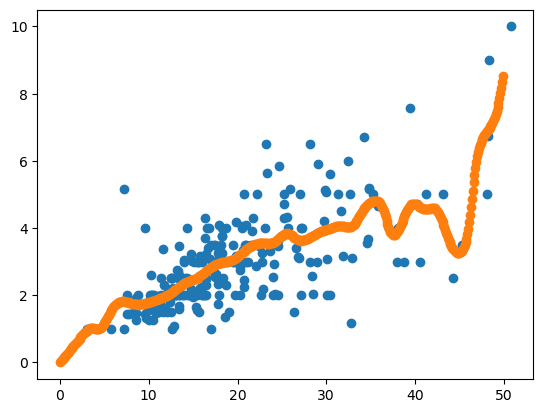

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
tou=1
data=pd.read_csv("tips.csv")
X_train=np.array(data.total_bill)
print(X_train)
X_train=X_train[:,np.newaxis]
print(len(X_train))
y_train=np.array(data.tip)
X_test=np.array([i/10 for i in range(500)])
X_test=X_test[:,np.newaxis]
y_test=[]
count=0
for r in range(len(X_test)):
    wts=np.exp(-np.sum((X_train-X_test[r])**2,axis=1)/(2*tou**2))
    W=np.diag(wts)
    factor1=np.linalg.inv(X_train.T.dot(W).dot(X_train))#factor=XT.W.X
    parameters=factor1.dot(X_train.T).dot(W).dot(y_train)
    prediction=X_test[r].dot(parameters)
    y_test.append(prediction)
    count+=1
print(len(y_test))
y_test=np.array(y_test)
plt.plot(X_train.squeeze(),y_train,'o')
plt.plot(X_test.squeeze(),y_test,'o')
plt.show()

### Program 10

Accuracy score  1.0


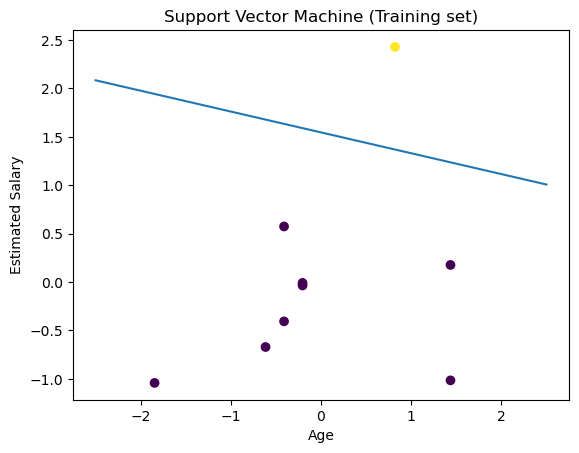

In [26]:
#implement and demonstrate classification algorithm using support vector machine Algorithm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
datasets = pd.read_csv('lab10.csv')
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25,
random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)
Y_Pred = classifier.predict(X_Test)
from sklearn import metrics
print("Accuracy score ",metrics.accuracy_score(Y_Test, Y_Pred))
plt.scatter(X_Train[:,0], X_Train[:, 1],c=Y_Train)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
w=classifier.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(-2.5,2.5)
yy=a*xx -(classifier.intercept_[0])/w[1]
plt.plot(xx,yy)
plt.show();
plt.scatter(X_Test[:,0], X_Test[:, 1],c=Y_Test)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('estimated salary')
w= classifier.coef_[0]
a=w[0]/w[1]
xx=np.linspace(-2.5,2.5)
yy=a*xx-(classifier.intercept_[0])/w[1]
plt.plot(xx,yy)
plt.show()
